# Анализ A/B-теста по увеличению выручки интернет-магазина

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

У нас есть данные

Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Цель исследования**:
- Подготовлен список гипотез для увеличения выручки крупного интернет магазина. Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

 
**Таким образом, исследование пройдёт в несколько этапов:**
 1. Обзор данных.
 2. Приоритизация гипотез.
 3. Анализ A/B-теста
 4. Формлировка общего вывода по полученным результатам

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загрузка и подготовка данных к анализу

### Обзор данных

Загрузим данные и изменим тип, где необходимо

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis.head())
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
orders['date'] = pd.to_datetime(orders['date'])

In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [7]:
orders['date'] = pd.to_datetime(orders['date'])

### Подготовка данных

In [8]:
visitors_groups = orders.groupby('visitorId')['group'].nunique()
sum(visitors_groups == 2) 

58

58 пользователей попали в обе группы. Удалим их

In [9]:
orders = orders[orders['visitorId'].isin(visitors_groups[visitors_groups == 1].index)]

In [10]:
orders.groupby('group')['visitorId'].nunique()

group
A    445
B    528
Name: visitorId, dtype: int64

In [11]:
print(round((((528-445)/445)*100), 2), '%')

18.65 %


Количество пользователей в различных группах различается почти на 20%.

In [12]:
visitors['date'].agg(['min', 'max'])

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

В течение месяца (август 2019) был проведен несбалансированный A/B-тест.

Можно сказать, что данные получены хорошие.  A/B тест несбалансированный, в группах неодинаковое количество пользователей. Данные строго из промежутка одного месяца. 58 пользователей попали в обе группы, но это не страшно.

## Приоритизация гипотез

### Фреймворк ICE

In [13]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [14]:
hypothesis.sort_values(by='ICE', ascending=False).round(3)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000


Самые перспективные гипотезы по ICE под номерами 8, 0, 7, 6

### Фреймворк RICE

In [15]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

In [16]:
hypothesis.sort_values(by='RICE', ascending=False).round(3)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000,3.0


По RICE перспективные гипотезы 7, 2, 0, 6. Гипотеза 8, считавшаяся самой перспективной по ICE, заняла 5 место, так как она затрагивает очень мало пользователей. 2 и 7 заняли первые места, хотя по ICE заняли 3 и 5 места, так произошло из-за большого охвата, они затронут много пользователей. 

## Анализ A/B-теста

### Кумулятивная выручка

In [17]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_group = (orders
                 .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                        orders['group'] ==  x['group'])]
                .agg({'date':'max', 'group':'max', 'revenue':'sum',
                      'transactionId':'nunique'}), axis=1) 
                .sort_values(by=['date','group']))
orders_group.rename(columns={'transactionId':'orders'}, inplace=True)
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_group = (visitors
                 .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                          visitors['group'] ==  x['group'])]
                .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                .sort_values(by=['date','group']))
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
data = orders_group.merge(visitors_group, on = ['group','date'])

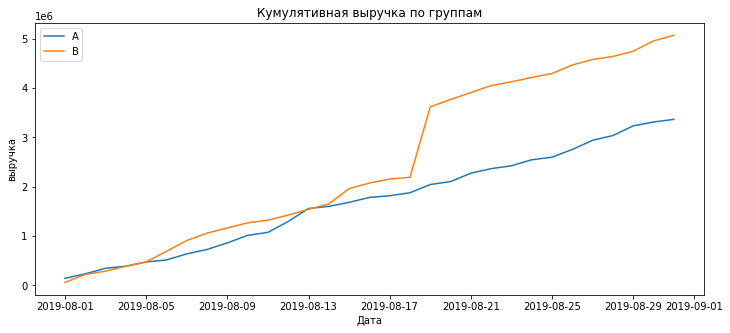

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
orders_group_a = orders_group[orders_group['group']=='A']
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
orders_group_b = orders_group[orders_group['group']=='B']
plt.figure(figsize=(12, 5))
# Строим график выручки группы А
plt.plot(
    orders_group_a['date'],
    orders_group_a['revenue'],
    label='A') 
# Строим график выручки группы B
plt.plot(
    orders_group_b['date'],
    orders_group_b['revenue'],
    label='B')
plt.xlabel('Дата')
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.show()

- Выручка равномерно растет, кроме резкого скачка у группы B с 18 по 19 день
- В течение теста выручка стабильно больше у группы B

### Кумулятивный средний чек

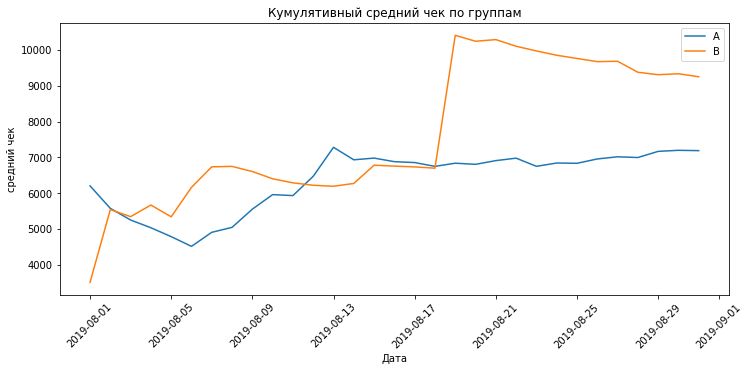

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(orders_group_a['date'], orders_group_a['revenue'] / orders_group_a['orders'], label='A')
plt.plot(orders_group_b['date'], orders_group_b['revenue'] / orders_group_b['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend();

До 19 августа средний чек нестабилен в обеих группах. Потом у А группы он  установился около 7000, а у В группы после резкого скачка наблюдается снижение.

### Относительное изменение кумулятивного среднего чека

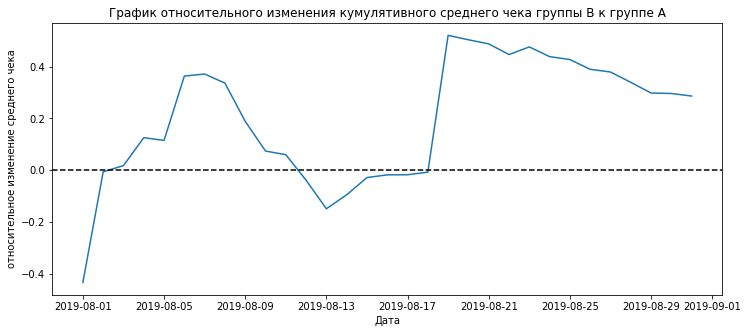

In [20]:
mergedCumulativeRevenue = orders_group_a.merge(orders_group_b, left_on='date',
                                               right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.ylabel('относительное изменение среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Много резких изменений до 19 августа, график нестабилен, после наблюдается тренд на снижение отношения среднего чека.

### Среднее количество заказов

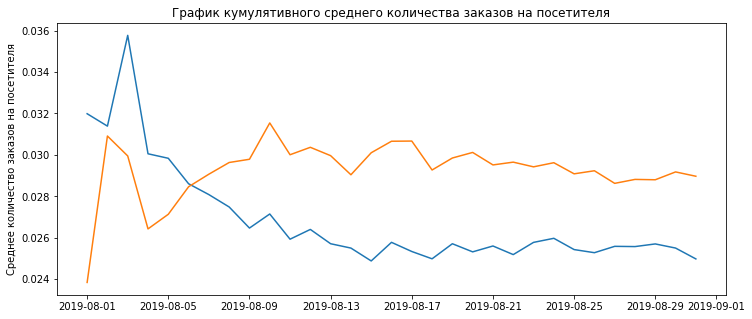

In [21]:
data['cumulativeOrders'] = data['orders']/data['visitors']

# отделяем данные по группе A
cumulativeDataA = data[data['group']=='A']

# отделяем данные по группе B
cumulativeDataB = data[data['group']=='B']

plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['cumulativeOrders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['cumulativeOrders'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.ylabel("Среднее количество заказов на посетителя")
plt.show()

В начале теста среднее количество заказов на посетителя обеих групп подскачили вверх, а затем так же резко упали вниз. Потом cреднее количество заказов на посетителя группы В стала расти, а cреднее количество заказов на посетителя группы А, наоборот, просела. Далее особо ничего не менялось, до конца теста cреднее количество заказов на посетителя обеих групп были стабильны и колебались около одних и тех же значений.

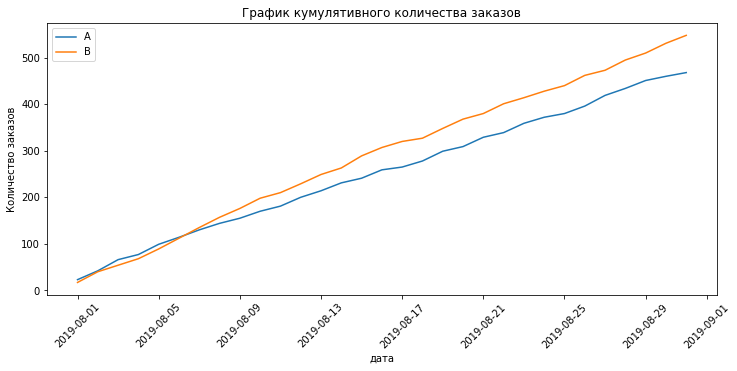

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(orders_group_a['date'], orders_group_a['orders'], label='A')
plt.plot(orders_group_b['date'], orders_group_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного количества заказов')
plt.ylabel("Количество заказов")
plt.xlabel('дата')
plt.legend()
plt.show()

- В первую неделю количество заказов у группы B немного меньше. Со второй недели и до конца месяца разница стабильно увеличивается в пользу группы B
- Нет всплеска числа заказов с 18 по 19 день, значит резкий скачек выручки у группы B обусловлен дорогими заказами

### Относительное изменение кумулятивного среднего количества заказов на посетителя

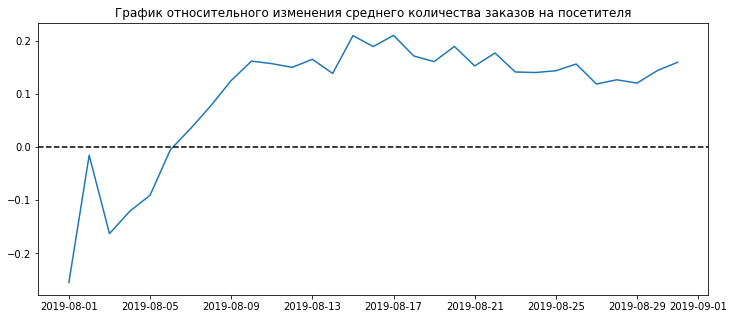

In [23]:

mergedCumulativeConversions = cumulativeDataA[['date','cumulativeOrders']].merge(cumulativeDataB[['date','cumulativeOrders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 5))
plt.title('График относительного изменения среднего количества заказов на посетителя')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['cumulativeOrdersB']/mergedCumulativeConversions['cumulativeOrdersA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Показатель относительного изменения среднего количества заказов на посетителя у группы B значительно лучше, чем у групппы A

### Количество заказов по пользователям

In [24]:
orders_by_users = (orders.groupby('visitorId')['revenue'].count()
                   .reset_index()
                   .rename(columns={'revenue':'orders'}))

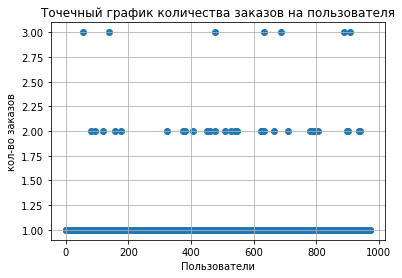

In [25]:
x_values = pd.Series(range(0,orders_by_users['orders'].count()))
plt.scatter(x_values, orders_by_users['orders'])
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('кол-во заказов')
plt.title('Точечный график количества заказов на пользователя')
plt.show()

В основном пользователи совершают 1 покупку, больше 3 покупок не бывает.

In [26]:
percentile = np.percentile(orders_by_users['orders'], [95,99])
percentile_99 = percentile[1]
print('95 перцентиль:', percentile[0])
print('99 перцентиль:', percentile[1])

95 перцентиль: 1.0
99 перцентиль: 2.0


Будем считать аномальными пользователями тех, кто сделал 3 заказа. Удалим значения выше 95 перцентиля.

In [27]:
del_orders = len(orders_by_users[orders_by_users['orders'] > percentile_99])
del_orders

7

Удалится 7 заказов

In [28]:
orders_by_users_clean = orders_by_users.query('orders <= @percentile_99')

### Стоимости заказов

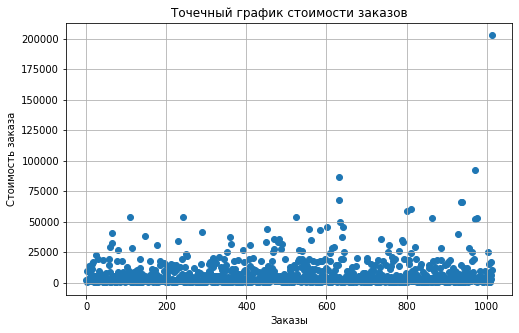

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(x=range(sum(orders['revenue'] < 10**6)), y=orders.loc[orders['revenue'] < 10**6,'revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов')
plt.grid()

In [30]:
per = np.percentile(orders['revenue'], [95,99])
per_99 = per[1]
print('95 перцентиль:', per[0])
print('99 перцентиль:', per[1])

95 перцентиль: 26785.0
99 перцентиль: 53904.0


Будем считать аномальными пользователями тех, кто совершил заказы дороже 54 тыс. Значения выше 99 перцентиля удалим

In [31]:
del_price = len(orders[orders['revenue'] > per_99])

Удалится 9 заказов

In [32]:
orders_clean = orders.query('revenue < @per_99')

###  Статистическая значимость различий в среднем количестве заказов на посетителя

- Гипотеза H0 - среднее количество заказов на посетителя групп A и B равны
- Альтернативная гипотеза H1 - среднее количество заказов на посетителя групп не равны

Уровень значимости 0.05

В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо. Да, они учитывают все значения. Но в этом также их слабое место: одно выбивающееся значение существенно влияет на результат.

Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни.  

Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Ранг — это место в упорядоченной выборке. Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. Значит, просто добавились значения, сдвинувшие все остальные.

In [33]:
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']
orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [34]:
sampleA = pd.concat([orders_by_usersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() -
                                                  len(orders_by_usersA['orders'])), name='orders')
])
sampleB = pd.concat([orders_by_usersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() -
                                                  len(orders_by_usersB['orders'])), name='orders')])

In [35]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided' )[1]))
print('Среднее количество заказов на посетителя группы А: {:.1%}'.format(sampleA.mean()))
print('Среднее количество заказов на посетителя группы B: {:.1%}'.format(sampleB.mean()))
print('Относительный прирост среднего количества заказов на посетителя группы B:{:.3}'.format(sampleB.mean()/sampleA.mean()-1))

p_value: 0.01102
Среднее количество заказов на посетителя группы А: 2.5%
Среднее количество заказов на посетителя группы B: 2.9%
Относительный прирост среднего количества заказов на посетителя группы B:0.16


p значение меньше уровня значимости, гипотеза H0 отвергается, среднее количество заказов на посетителя не равно.

### Статистическая значимость различий в среднем чеке заказа между группами

- H0 - средний чек групп A и B равны
- H1 - средний чек групп не равен

Уровень значимости 0.05

In [36]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],
                    alternative = 'two-sided' )[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))
print('Относительные различия в среднем чеке: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p_value: 0.82949
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
Относительные различия в среднем чеке: 0.287


p-значение больше уровня значимости, гипотеза не отвергается, то есть средние чеки групп равны. Относительное различие велико

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [37]:
del_orders+del_price

16

Всего аномальных пользователей получилось 16. 

In [38]:
(del_orders+del_price)/(visitors['visitors'].sum())*100

0.04249442260703283

Это составляет всего 0.04 процента от ощего числа пользователей, фильтрация разумная

- H0 - среднее количество заказов на посетителя групп A и B равны
- H1 - среднее количество заказов на посетителя групп не равны

Уровень значимости 0.05

In [39]:
orders_by_usersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [40]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0,
                                                           index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() -
                                                                              len(orders_by_usersA['orders'])), name='orders')
])
sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0,
                                                           index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() -
                                                                              len(orders_by_usersB['orders'])), name='orders')])

In [41]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided' )[1]))
print('Среднее количество заказов на посетителя группы А: {:.1%}'.format(sampleA.mean()))
print('Среднее количество заказов на посетителя группы B: {:.1%}'.format(sampleB.mean()))
print('Относительный прирост среднего количества заказов на посетителя группы B:{:.3}'.format(sampleB.mean()/sampleA.mean()-1))

p_value: 0.00867
Среднее количество заказов на посетителя группы А: 2.5%
Среднее количество заказов на посетителя группы B: 2.9%
Относительный прирост среднего количества заказов на посетителя группы B:0.167


p-значение меньше уровня значимости, гипотеза H0 отвергается, значит  cреднее количество заказов на посетителя групп не равны. До и после удаления аномальных пользователей есть статистически значимое различие в cреднеv количествt заказов на посетителя по группам при . После удаления аномальных пользователей разница в cреднеv количестве заказов на посетителяи между группами увеличилась с 16% до 17%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

- H0 - средний чек групп A и B равны
- H1 - средний чек групп не равен

Уровень значимости 0.05

In [42]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'],
                    orders_clean[orders_clean['group']=='B']['revenue'],
                   alternative = 'two-sided' )[1]
))
print('Средний чек группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))
print('Относительные различия в среднем чеке: {0:.3f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1)) 


p_value: 0.95446
Средний чек группы А: 6298.91
Средний чек группы B: 6211.16
Относительные различия в среднем чеке: -0.014


p-значение больше уровня значимости, гипотеза не отвергается, то есть средние чеки групп равны.  



Принимаю решение остановить тест и зафиксировать победу группы B, после очистки данных от аномалий выявились статистические различия в cреднем количестве заказов на посетителя групп, группа B лидирует. Удалось снизить относительные различия в среднем чеке с 29% до 1%

## Вывод

Мы загрузили данные, изменили типы нужных столбцов, провели АА-тестирование

Мы приоретизировали предложенные гипотезы с помощью фреймворков ICE и RICE.
Учет параметра Reach с помощью фреймворка RICE поменял приоритетность гипотез, полученных с помощью ICE. Гипотеза 7 о сборе баз клиентов для рассылок вышла на первое место из-за большого охвата пользователей. В топ вышли гипозы 2 и 8 о блоках рекомендаций и баннерной рекламе.

Постоили график кумулятивной выручки по группам и увиднли резкий скачок в группе B после 17.08. Это могло произойти из-за большого количества обычных заказов или каких-то аномально больших, конец августа - подготовка к новому учебному году. Постороили график кумуятивного среднего чека. Видим растущий стредний чек и небольше снижение с 13.08 в группе A. По графику кумулятивного среднего количества заказов на посетителя видим, среднее количество заказов  группы на посетителя  B стабильно превышет конверсию A на 0.004. Среднее количество заказов на посетителя группы B значительно лучше, чем у групппы A.

По графику количества заказов на пользователя можно сделать вывод, что в основном пользователи совершают 1 покупку, больше 3 покупок случается редко. Выводы подтверждает рассчет персентилей.

По графику стоимостей заказов можно сделать вывод, что в основном пользователи совершают покупки на сумму 30-50 тыс., выше случается очень редко

Мы собрали очищенные от аномальных значений данные. По сырым данным посчитали статистическую значимость различий конверсий и среднего чека групп, конверсии групп не равны. Провели те же тесты на очищенных данных и подтвердили вывод о различии конверсии групп, по очищенным данным относительная разница в среднем чеке мала, статистически значения среднего чека групп одинаковые.

Принимаем решение остановить тест и зафиксировать победу группы B